# PRINCIPAL COMPONENT ANALYSIS - DIFFERENT APPROACHES

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.io import loadmat

In [171]:
data1 = loadmat('ex7data1.mat')

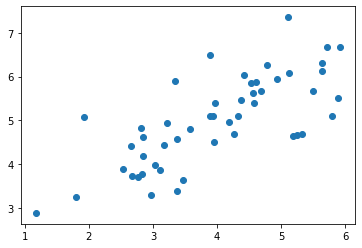

The size of X as in data1 is (50, 2)


In [172]:
X = data1['X']
fig, ax = plt.subplots(1,1)
ax.scatter(X[:,0], X[:,1])
plt.show()

print(f'The size of X as in data1 is {X.shape}')

## METHOD 1: PCA using Manual Eigen Calculation

#### Setting up Data and Co-Variance Matrix

In [173]:
X = data1['X']
X_norm = (X - np.mean(X, axis = 0))/np.std(X, axis=0)

In [174]:
m, n  = X.shape
X_cov = 1/m * X_norm.T.dot(X_norm)
X_cov

array([[1.        , 0.73553038],
       [0.73553038, 1.        ]])

#### Calculating the Eigen Values and Eigen Vectors

In [175]:
eig_vals, eig_vecs = np.linalg.eig(X_cov)

lambda_1 = eig_vals[0]
evec_1 = eig_vecs[:,0].reshape(n,1)

lambda_2 = eig_vals[1]
evec_2 = eig_vecs[:,1].reshape(n,1)

evec = np.append(evec_1, evec_2)
ortho = eig_vecs[0].dot(eig_vecs[1])


print(f'The given data has two features (columns) which means it will have 2 eigen values and 2 eigen vectors.\
\nThe eigen values are {lambda_1.round(4)} and {lambda_2.round(4)} and are sorted from high to low.\
\n\nEigen vector corresponding to first Eigen value is:\n {evec_1} with shape {evec_1.shape}\
\n\nEigen vector corresponding to second Eigen value is:\n {evec_2} with shape {evec_2.shape}\
\n\nThe dot product of the two eigen vectors is {ortho} indicating they are orthogonal.')

The given data has two features (columns) which means it will have 2 eigen values and 2 eigen vectors.
The eigen values are 1.7355 and 0.2645 and are sorted from high to low.

Eigen vector corresponding to first Eigen value is:
 [[0.70710678]
 [0.70710678]] with shape (2, 1)

Eigen vector corresponding to second Eigen value is:
 [[-0.70710678]
 [ 0.70710678]] with shape (2, 1)

The dot product of the two eigen vectors is 0.0 indicating they are orthogonal.


#### Dimensionality Reduction using Principal Component(s)

Projections of first five training examples:
[[-1.49631261]
 [ 0.92218067]
 [-1.22439232]
 [-1.64386173]
 [-1.2732206 ]]

Reconstruction from first PC shown for first five training examples:
[[-1.05805279 -1.05805279]
 [ 0.65208021  0.65208021]
 [-0.86577611 -0.86577611]
 [-1.16238578 -1.16238578]
 [-0.90030292 -0.90030292]]


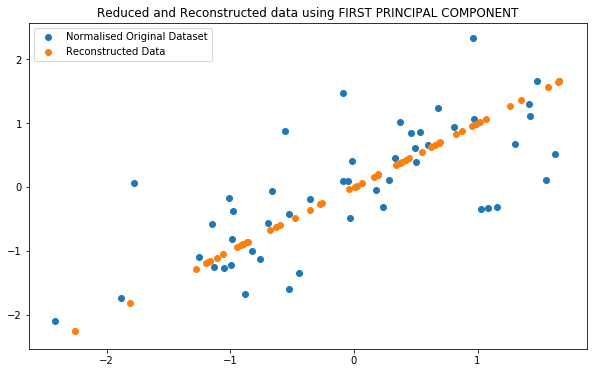

In [176]:
# Data Projection from first Eigen Vector --> First Princiapal Component (PC)
z_p1 = X_norm.dot(evec_1)
print(f'Projections of first five training examples:\n{z_p1[:5]}')

# Approx. Reconstruction of Original Data and Visualisation using FIRST PC 
X_rec = z_p1.dot(evec_1.T)
print(f'\nReconstruction from first PC shown for first five training examples:\n{X_rec[:5]}')

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(X_norm[:,0], X_norm[:,1], label='Normalised Original Dataset')
ax.scatter(X_rec[:,0], X_rec[:,1], label = 'Reconstructed Data')
ax.set_title('Reduced and Reconstructed data using FIRST PRINCIPAL COMPONENT')

ax.legend()
plt.show()

Projections of first five training examples:
[[-0.75623618]
 [ 0.26624695]
 [ 0.39968108]
 [-0.15320465]
 [ 0.11839619]]

Reconstruction from second PC shown for first five training examples:
[[ 0.53473973 -0.53473973]
 [-0.18826502  0.18826502]
 [-0.2826172   0.2826172 ]
 [ 0.10833205 -0.10833205]
 [-0.08371875  0.08371875]]


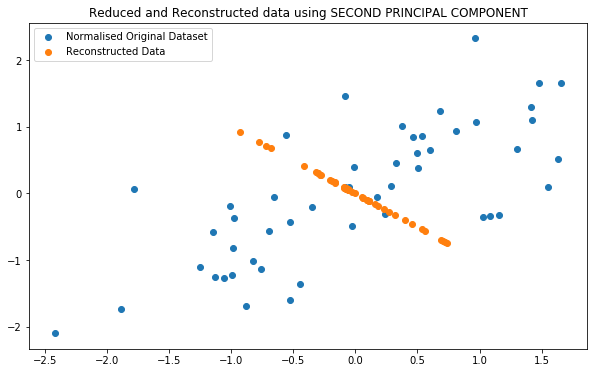

In [177]:
# Data Projection from second Eigen Vector --> Second Princiapal Component (PC)
z_p2 = X_norm.dot(evec_2)
print(f'Projections of first five training examples:\n{z_p2[:5]}')

# Approx. Reconstruction of Original Data and Visualisation using SECOND PC 
X_rec = z_p2.dot(evec_2.T)
print(f'\nReconstruction from second PC shown for first five training examples:\n{X_rec[:5]}')

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(X_norm[:,0], X_norm[:,1], label='Normalised Original Dataset')
ax.scatter(X_rec[:,0], X_rec[:,1], label = 'Reconstructed Data')
ax.set_title('Reduced and Reconstructed data using SECOND PRINCIPAL COMPONENT')

ax.legend()
plt.show()

## METHOD 2: PCA using Eigen Decomposition of Co-variance Matrix (EVD)

In [178]:
X_cov

array([[1.        , 0.73553038],
       [0.73553038, 1.        ]])

In [179]:
U, S, VT = np.linalg.svd(X_cov)

In [180]:
print(f'The obtained Eigen Values are {S[0]} and {S[1]}.\
\nThe Eigen vectors are {VT[:,0]} and {VT[:,1]}.\
\n\nWe observe that these values match with those done previously numerically. In the previous \
method, if "eigh" option is used instead of "eig", then the signs will also match.\
\nThe projection and reconstruction is similar to the above method. Only the vector names will change.\
\n\nTo Summarise:\nS Matrix of EVD = Eigen values from "eig" method.\
\nVT matrix of EVD = Eigen vectors obtained from "eigh" method.')

The obtained Eigen Values are 1.7355303763393295 and 0.26446962366067056.
The Eigen vectors are [-0.70710678 -0.70710678] and [-0.70710678  0.70710678].

We observe that these values match with those done previously numerically. In the previous method, if "eigh" option is used instead of "eig", then the signs will also match.
The projection and reconstruction is similar to the above method. Only the vector names will change.

To Summarise:
S Matrix of EVD = Eigen values from "eig" method.
VT matrix of EVD = Eigen vectors obtained from "eigh" method.


## METHOD 3: PCA using Single Value Decomposition (SVD)

<blockquote>
Additional Details:<br>
<a>https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca</a>

In [181]:
X_norm[:5]

array([[-0.52331306, -1.59279252],
       [ 0.46381518,  0.84034523],
       [-1.14839331, -0.58315891],
       [-1.05405373, -1.27071783],
       [-0.98402167, -0.81658417]])

In [182]:
U, S, VT = np.linalg.svd(X_norm)

In [183]:
print(f'The obtained Singular Values are {S[0]} and {S[1]}.\
\nThe relation b/w Singular Values of SVD and Eigen Values are in the web-page.\
\n\nThe Right Singular Matrix Columns are {VT[:,0]} and {VT[:,1]}.\
\nWe observe that these values match with those done previously numerically and symbolically. Hence, the right singular matrix\
is nothing but the Eigen Vectors.\
\n\nTo Summarise:\nS Matrix of SVD = Singular Values.\
\nVT matrix (Right Singular) of SVD = Eigen vectors obtained from "eigh" method.\
\n\nDIRECT SVD CAN BE ONLY DONE WHEN THE DATA SET IS MEAN CENTERED AND PREFERABLY STANDARDISED.')

The obtained Singular Values are 9.315391501003406 and 3.6364104805472013.
The relation b/w Singular Values of SVD and Eigen Values are in the web-page.

The Right Singular Matrix Columns are [0.70710678 0.70710678] and [ 0.70710678 -0.70710678].
We observe that these values match with those done previously numerically and symbolically. Hence, the right singular matrixis nothing but the Eigen Vectors.

To Summarise:
S Matrix of SVD = Singular Values.
VT matrix (Right Singular) of SVD = Eigen vectors obtained from "eigh" method.

DIRECT SVD CAN BE ONLY DONE WHEN THE DATA SET IS MEAN CENTERED AND PREFERABLY STANDARDISED.


#### Calculation of Eigen Values from Singular Values

In [184]:
S = S.reshape(-1,1)
sigma_sqr = S**2

In [185]:
eig_derived = (1/len(X_norm)) * sigma_sqr
print(f'The derived Eigen Values are {eig_derived[0]} and {eig_derived[1]}.\
\nThese match with the manually calculated values.')

The derived Eigen Values are [1.73553038] and [0.26446962].
These match with the manually calculated values.


#### Dimensionality Reduction and Projection Matrix (z)
<blockquote>
As Right Singular Matrix are the Eigen Vectors, dimensionlaity reduction and reconstruction can be done using dot product of VT and X_norm to get the projection vectors z and later reconstruction using z. This is similar to the regular approach.<br><br>
Alternative approach is to get the projection matrix z is by using the dot product of 'k' columns of U with k x k singular values as shown.

In [186]:
m, n = X_norm.shape
z_p1 = (U[:,0].reshape(-1,1).dot(S[0])).reshape(m,1)
print('The first column of left Singular Matrix U is (dot) multiplied with the first Singular value to get the first Principal\
Projection Matrix z.\nThese results match exactly with the Method-1 First Principal Projection Matrix.')
print(f'\nThe first five examples of the projection vector is :\n{z_p1[:5]}')

The first column of left Singular Matrix U is (dot) multiplied with the first Singular value to get the first PrincipalProjection Matrix z.
These results match exactly with the Method-1 First Principal Projection Matrix.

The first five examples of the projection vector is :
[[-1.49631261]
 [ 0.92218067]
 [-1.22439232]
 [-1.64386173]
 [-1.2732206 ]]


#### Reconstruction Matrix from decomposed matrices U, S and VT
<blockquote>For a certain selection of columns 'k' in the left singular matrix U, corresponding columns in the Singular value and Right singular matrix can be taken to get the aprrox. reconstruction of the Original matrix.<br><br>
For example, first column of matrix U; first (highest) Singular value and the first column of matrix V (transpose) will give the approx. reconstruction data based on the FIRST PRINCIPAL COMPONENT.<br><br>
Taking the second column data from matrix U will give reconstruction from SECOND PRINCIPAL COMPONENT.<br><br>
Note that all columns of U from 3 to 50 will not contribute to the reconstruction as the Singular Value matrix has zeros.

The first five training sets of the reconstructed matrix is:
 [[-1.05805279 -1.05805279]
 [ 0.65208021  0.65208021]
 [-0.86577611 -0.86577611]
 [-1.16238578 -1.16238578]
 [-0.90030292 -0.90030292]]

The first five training sets of the reconstructed matrix is:
 [[ 0.53473973 -0.53473973]
 [-0.18826502  0.18826502]
 [-0.2826172   0.2826172 ]
 [ 0.10833205 -0.10833205]
 [-0.08371875  0.08371875]]


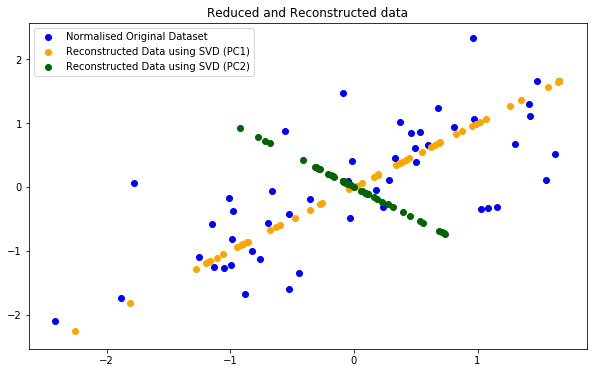

It may appear from the plot that the two principal comopnents are not orthogonal to each other.
This is not true and can be verified using orthogonality check.


In [187]:
U_PC1 = U[:,0].reshape(-1,1)
S_PC1 = S[0].reshape(-1,1)
VT_PC1 = VT[:,0].reshape(-1,1)

X_rec_PC1 = (U_PC1.dot(S_PC1)).dot(VT_PC1.T)
print(f'The first five training sets of the reconstructed matrix is:\n {X_rec_PC1[:5]}')

U_PC2 = U[:,1].reshape(-1,1)
S_PC2 = S[1].reshape(-1,1)
VT_PC2 = VT[:,1].reshape(-1,1)

X_rec_PC2 = (U_PC2.dot(S_PC2)).dot(VT_PC2.T)
print(f'\nThe first five training sets of the reconstructed matrix is:\n {X_rec_PC2[:5]}')

####################################################################################################

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(X_norm[:,0], X_norm[:,1], label='Normalised Original Dataset', color='blue')
ax.scatter(X_rec_PC1[:,0], X_rec_PC1[:,1], label = 'Reconstructed Data using SVD (PC1)', color='orange')
ax.scatter(X_rec_PC2[:,0], X_rec_PC2[:,1], label = 'Reconstructed Data using SVD (PC2)', color='darkgreen')
ax.set_title('Reduced and Reconstructed data')

ax.legend()
plt.show()

print(f'It may appear from the plot that the two principal comopnents are not orthogonal to each other.\
\nThis is not true and can be verified using orthogonality check.')

#### Orthogonality Check
<blockquote>We know that the co-variance matrix of the training set is Symmetric.<br>
It can be considered that the first column of VT is the eigen vector of matrix X_norm while the second column corresponds to the eigen vector of the transpose of X_norm.<br><br>
<b><i>Thus, the dot product of the columns of the Right Singular Matrix VT is zero. This means that the Principal Components are Orthogonal.</i></b>

In [188]:
eig_1 = VT[:,0].reshape(2,1)
eig_2 = VT[:,1].reshape(2,1)

ortho = eig_1.T.dot(eig_2)
print(f'The product of the Eigen vectors is {int(ortho)}. This makes the Principal Components Orthogonal.')

The product of the Eigen vectors is 0. This makes the Principal Components Orthogonal.


### TO SUMMARISE:
#### 1. It is recommended to perform PCA using the direct Eigen Value approach or SVD on the mean centered data.
#### 2. The results from Direct Eigen Values and Direct SVD match exactly and identically.
#### 3. Eigen-value decomposition of the co-variance matrix can be avoided.
#### 4. Scikit learn PCA module is also based on SVD.

#### Other Data

In [189]:
# def feat_norm(X):
#     mu = np.mean(X, axis=0)
#     std = np.std(X, axis=0)
#     X_norm = (X - mu)/std
#     return X_norm, mu, std

# from numpy.linalg import svd

# def pca(X):
#     X_norm, mu, sigma = feat_norm(X)
#     m,n = X.shape
#     Co_M = (1/m) * (X_norm.T.dot(X_norm))
    
#     U, S, V = svd(Co_M)
    
#     return U, S, V, X_norm, mu

# def project_Z(X, U, k):
#     U_reduced = U[:,:k]
#     z = X.dot(U_reduced)
#     return z

# def recover_U(z, U, k):
#     U_reduced = U[:,:k]
#     U_rec = z.dot(U_reduced.T)
#     return U_rec